## Exploratory Data Analysis of Titanic Survivors

#### The aim of EDA is to analysis people who survived the tragedy and who didn't. We will analyse, features like age, gender and passenger class which made an impact on survival or it didn't.

In [1]:
import pandas as pd #import pandas for data manipulation
import numpy as np #for scientific computing

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read titanic data set from csv file into pandas titanic dataframe
train_data = pd.read_csv('/Users/radhikasrinivasan/AnacondaProjects/titanic-train.csv')
#Read titanic testing data set from csv file into pandas test dataframe
test_data = pd.read_csv('/Users/radhikasrinivasan/AnacondaProjects/titanic_test.csv')

#### Data Analysis

In [3]:
train_data.info() #info() summary of train_data dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### The training dataset has 891 records and 12 columns. 
##### Survived is the target variable. 
survival| Survival | 0 = No, 1 = Yes  
pclass| Ticket class| A proxy for socio-economic status (SES) 
1st = Upper | 2nd = Middle | 3rd = Lower         
sex | Sex	 ||  Age|Age in years	
sibsp  |# of siblings / spouses aboard the Titanic	
parch  |# of parents / children aboard the Titanic         
ticket |Ticket number
Embarked | Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train_data['Survived'].unique()

array([0, 1])

In [5]:
test_data.info() #info() summary of test_data dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above describe, we can see that only 38% out of the training dataset survived the Titanic.
Passenger's age ranges from 0.4 to 80. 
Age has missing values only 714 records are present.
Oldest passenger survived was 80, while the youngest was 0.42 and mean average age was 29 years.
Pclass - class1, class2 and class3.
Fares varies significantly. The upper quartile - 31 and mean fare - 32 but only few passengers paid the max fare of 512
In Parch, 1 signifies for every parent or child on board while 0 signifies children who travelled with nannies

In [7]:
NaNTotal = train_data.isnull().sum().sort_values(ascending = False).head(5)
NaNTotal

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64

From table above, Cabin has 77% of missing values followed by Age with a 19% and Embarked with a least of 2 values. Dropping is not a good idea so we need to think of a better idea.

In [8]:
NaNTotal = test_data.isnull().sum().sort_values(ascending = False).head(5)
NaNTotal

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
dtype: int64

In [9]:
p1 = train_data.isnull().sum()/train_data.isnull().count() * 100
p2 = (round(p1, 1)).sort_values(ascending = False) 
NaNdata = pd.concat([NaNTotal, p2], axis = 1, sort=False, keys = ['   Total Value', '%'])
NaNdata.head(5)

,Total Value,%
Cabin,327.0,77.1
Age,86.0,19.9
Fare,1.0,0.0
Embarked,0.0,0.2
Ticket,0.0,0.0


In [10]:
p1 = test_data.isnull().sum()/test_data.isnull().count() * 100
p2 = (round(p1, 1)).sort_values(ascending = False) 
NaNdata = pd.concat([NaNTotal, p2], axis = 1, sort=False, keys = ['   Total Value', '%'])
NaNdata.head(5)

,Total Value,%
Cabin,327.0,78.2
Age,86.0,20.6
Fare,1.0,0.2
Embarked,0.0,0.0
Ticket,0.0,0.0


How to handle missing values? There are few options to consider

In [11]:
train_data.dropna(how='any').shape #default-any, temporarily drops

(183, 12)

In [12]:
train_data.dropna(how='all').shape #if all values are missing drop

(891, 12)

In [13]:
train_data.dropna(subset=['Cabin', 'Age'], how='any').shape #drop a row if either of it is missing drop it

(185, 12)

In [14]:
train_data.dropna(subset=['Cabin', 'Age'], how='all').shape #drop a row if both cols have missing value

(733, 12)

In [15]:
train_data['Cabin'].value_counts(dropna=False)

NaN            687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
A32              1
E17              1
D30              1
D45              1
D28              1
Name: Cabin, Length: 148, dtype: int64

In [16]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
train_data['Cabin'].fillna(value='Z11', inplace=True) #replace NaN with 'Z11'

In [18]:
train_data['Cabin'].isnull().sum()

0

In [19]:
test_data['Cabin'].fillna(value='Z11', inplace=True) #replace NaN with 'Z11'

In [20]:
test_data['Cabin'].isnull().sum()

0

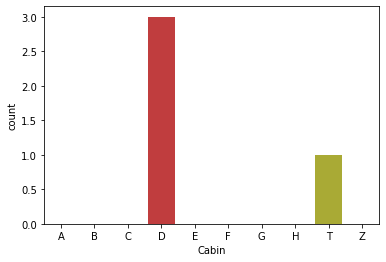

In [21]:
sns.countplot(train_data['Cabin'],order=['A','B','C','D','E','F','G','H','T','Z'])
plt.show()

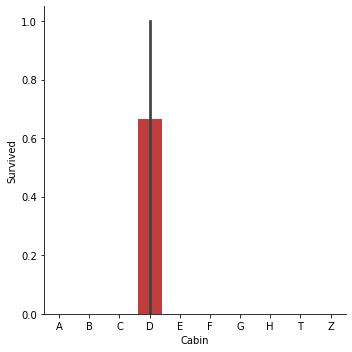

In [22]:
sns.catplot(y="Survived", x="Cabin", data=train_data, kind="bar",order=['A','B','C','D','E','F','G','H','T','Z'])
plt.show()

In [23]:
train_data['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [24]:
#Handle missing age value
#Replace the missing values with the mean(for well distributed data) 
#or median(in case there're a lot of outliers)

## apply the median value on the Age NaN
train_data.Age = train_data.Age.fillna(train_data.Age.median())

In [25]:
## apply the median value on the Age NaN
test_data.Age = test_data.Age.fillna(test_data.Age.median())

In [26]:
train_data['Age'].value_counts(dropna=False)

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [27]:
test_data['Age'].value_counts(dropna=False)

27.0    98
24.0    17
21.0    17
22.0    16
30.0    15
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [28]:
train_data.Age = train_data.Age.fillna(train_data.median())

In [29]:
train_data['Age'].value_counts(dropna=False)

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [30]:
test_data.Age = test_data.Age.fillna(test_data.median())

In [31]:
test_data['Age'].isnull().sum()

0

In [32]:
train_data['Embarked'].isnull().sum()

2

In [33]:
test_data['Embarked'].isnull().sum()

0

In [34]:
#Maximum passengers boarded from port S, we will replace NaN with S
train_data['Embarked'].fillna('S', inplace=True)

In [35]:
train_data['Embarked'].isnull().sum()

0

In [36]:
#Maximum passengers boarded from port S, we will replace NaN with S
test_data['Embarked'].fillna('S', inplace=True)

In [37]:
test_data['Embarked'].isnull().sum()

0

In [38]:
train_data['Fare'].isnull().sum()

0

In [39]:
test_data['Fare'].isnull().sum()

1

In [40]:
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)

In [41]:
test_data['Fare'].isnull().sum()

0

In [42]:
#create Fare bands
train_data['FareBand'] = pd.qcut(train_data.Fare,7,labels=False)

In [43]:
#create Fare bands
test_data['FareBand'] = pd.qcut(test_data.Fare,7,labels=False)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
FareBand       891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
FareBand       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [46]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z11,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,6
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z11,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z11,S,1


In [50]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Z11,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Z11,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Z11,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Z11,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Z11,S,2


#### Label encoding

In [51]:
#import label encoder
from sklearn import preprocessing

#encode variables into numeric labels
labelEnc = preprocessing.LabelEncoder()

train_data['Embarked'] = labelEnc.fit_transform(train_data['Embarked'])
train_data['Sex'] = labelEnc.fit_transform(train_data['Sex'])

In [52]:
test_data['Embarked'] = labelEnc.fit_transform(test_data['Embarked'])
test_data['Sex'] = labelEnc.fit_transform(test_data['Sex'])

In [53]:
train_data['Age'] = train_data['Age'].astype(int)

In [54]:
test_data['Age'] = test_data['Age'].astype(int)

In [55]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,Z11,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,6
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,Z11,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,5
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,Z11,2,1


In [56]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,Z11,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,Z11,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,Z11,1,2
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,Z11,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.2875,Z11,2,2


In [57]:
p1 = train_data.isnull().sum()/train_data.isnull().count() * 100
p2 = (round(p1, 1)).sort_values(ascending = False) 
NaNdata = pd.concat([NaNTotal, p2], axis = 1, sort=False, keys = ['   Total Value', '%'])
NaNdata.head(5)

,Total Value,%
Cabin,327.0,0.0
Age,86.0,0.0
Fare,1.0,0.0
Embarked,0.0,0.0
Ticket,0.0,0.0


From above, we can see that there are no NaN missing data

In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,Z11,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,6
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,Z11,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,5
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,Z11,2,1


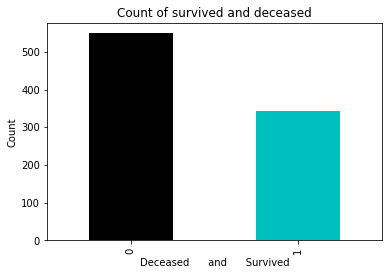

In [59]:
%matplotlib inline
train_data['Survived'].value_counts().plot(kind='bar', color = ['k', 'c'])
plt.ylabel('Count')
plt.xlabel('Deceased      and      Survived')
plt.title('Count of survived and deceased')
plt.show()

It is evidence from the plot that number of people who survived are less than who didn't. More than 300 passengers survived while deceased are more than 500.

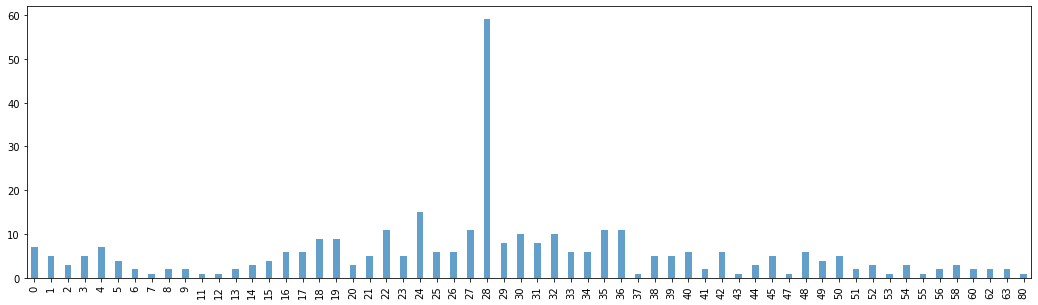

In [60]:
#Continuous feature - Age. Value ranges from 0.42 to 80 (min-max)
train_data[train_data['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar',width= 0.4, alpha = 0.7, figsize = (18,5))
plt.show()

It looks like survival rates were highest for those in their twenties and thirties. There is an another, considerably smaller peak for very young and drip for the old. Oldest passenger who survived was 80 years old.

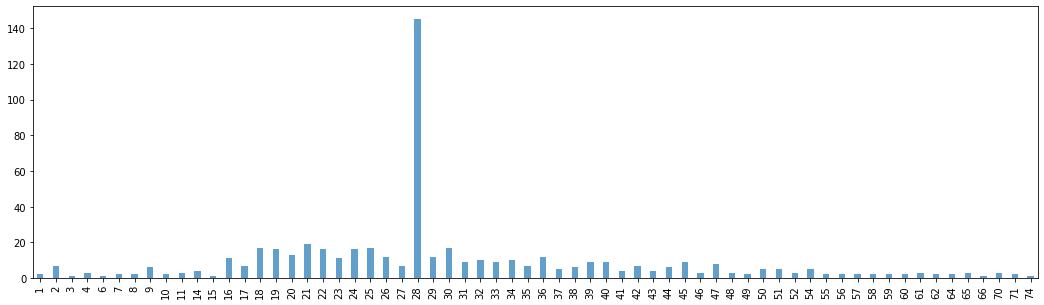

In [61]:
train_data[train_data['Survived'] == 0]['Age'].value_counts().sort_index().plot(kind='bar',width= 0.4, alpha = 0.7, figsize = (18,5))
plt.show()

Highest death rate was among passengers who were aged 21 years. Mostly, those aged between 18-28 years old did not survive.

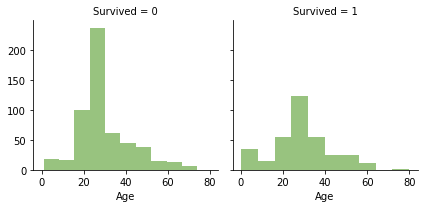

In [62]:
grid1 = sns.FacetGrid(train_data, col = 'Survived')
grid1.map(plt.hist, 'Age', bins = 10, color="#338800", alpha = .5)
plt.show()

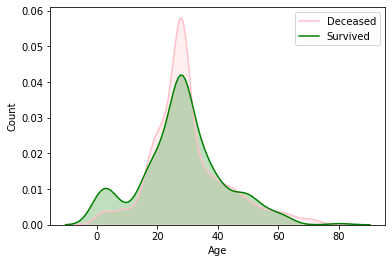

In [63]:
#Age distribution
age = sns.kdeplot(train_data['Age'][(train_data['Survived']==0)], color="Pink", shade=True)
age = sns.kdeplot(train_data['Age'][(train_data['Survived']==1)], color="Green", shade=True)
age.set_xlabel("Age")
age.set_ylabel("Count")
age = age.legend(["Deceased","Survived"])

In [64]:
#We will try binning
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
train_data['AgeBin'] = pd.cut(train_data['Age'], bins)

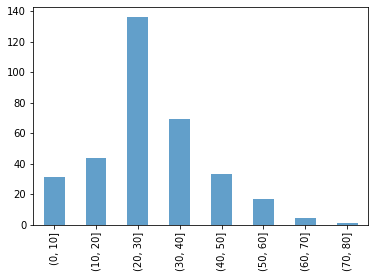

In [65]:
train_data[train_data['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar', alpha = 0.7)
plt.show()

20-30 age range were the highest survivers

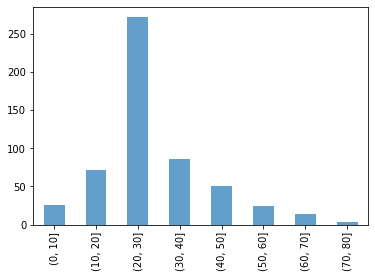

In [66]:
train_data[train_data['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar', alpha = 0.7)
plt.show()

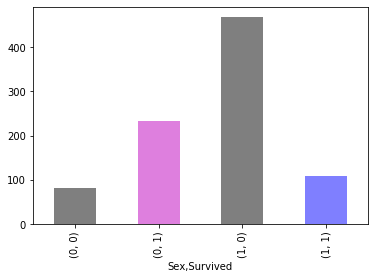

In [67]:
%matplotlib inline
train_data.groupby(['Sex', 'Survived'])['Survived'].count().sort_index().plot(kind='bar', color = ['k', 'm','k','b'], alpha = 0.5)
plt.show()

We can see the survival count and survival rate by gender. We can infer from the plot that above 400+ male passengers were dead, when compared to the female passengers.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


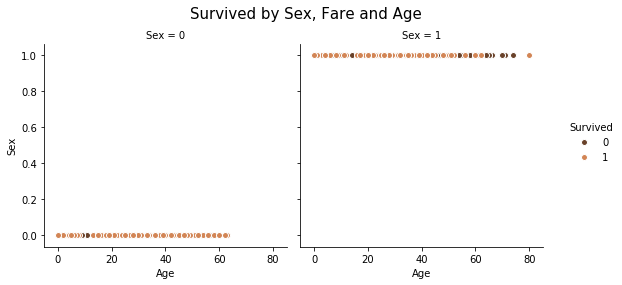

In [68]:
g = sns.FacetGrid(train_data, size=4,hue="Survived", col ="Sex", margin_titles=True,
                palette='copper')
g.map(plt.scatter, "Age", "Sex",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 15)
plt.subplots_adjust(top=0.85)

#### Categorical features - Gender and Embarked
#### Gender - Female and male || Embarked - 'C, S, Q'
#### Nominal Variables - because we cannot sort or order such variables

In [69]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

#### Ordinal feature - PClass - We can sort and order the values.

In [70]:
crossAna = pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass, margins=True)
crossAna.style.background_gradient(cmap = 'summer_r')

From the above, we can infer that 233 female passengers survived out of 344 and 109 survived out of 577 male. The survival rate of female is much higher than that of male passengers. Pclass 1 female survivors is highest when compare to Pclass 2 and Pclass3 female passengers. 300 Male passenger did not survive in Pclass 3 which has the highest death rate in comparison with Pclass 2 and Pclass 3.

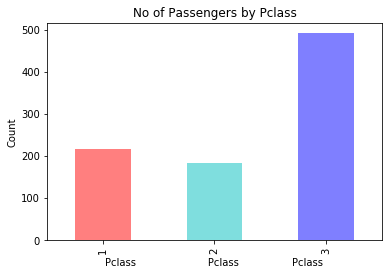

In [71]:
train_data['Pclass'].value_counts().sort_index().plot(kind='bar', color = ['r', 'c','b'], alpha = 0.5)
plt.ylabel('Count')
plt.xlabel('Pclass                       Pclass                 Pclass')
plt.title('No of Passengers by Pclass')
plt.show()

Pclass3 has the highest number of passengers while Pclass2 being the lowest and Pclass 1 being slightly more than Pclass2.

In [72]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


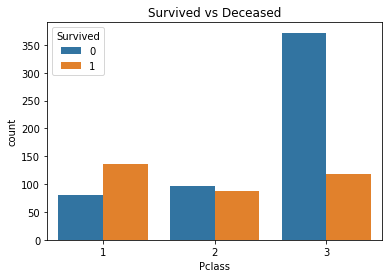

In [73]:
sns.countplot('Pclass', hue='Survived', data=train_data)
plt.title('Survived vs Deceased')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


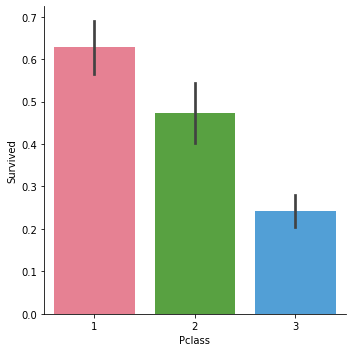

In [74]:
sns.catplot(x="Pclass", y="Survived", data = train_data, kind="bar",size = 5, palette = "husl")
plt.show()

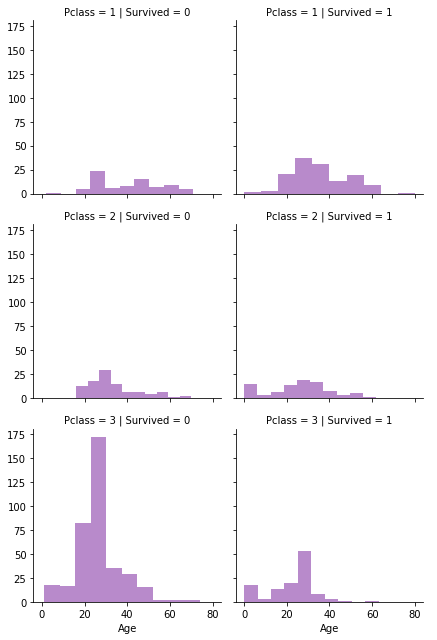

In [75]:
grid2 = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass')
grid2.map(plt.hist, 'Age', bins = 10, color="#9b59b6", alpha = 0.7)
grid2.add_legend()
plt.show()

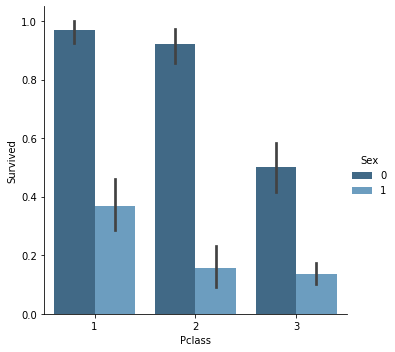

In [76]:
sns.catplot(hue="Sex", x="Pclass",y="Survived", data = train_data, kind="bar",size = 5, palette = "Blues_d")
plt.show()

In [77]:
crossAna5 = pd.crosstab([train_data.Sex, train_data.Age],train_data.Survived, margins=True)
crossAna5.style.background_gradient(cmap = 'summer_r')

Men have a high probability of survival when they are between 18-30 & low probability between 5-18, which is true for women but not fully. For women suvival chances are higher between 14-40.

In [78]:
crossAna3 = pd.crosstab([train_data.Pclass],train_data.Survived, margins=True)
crossAna3.style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


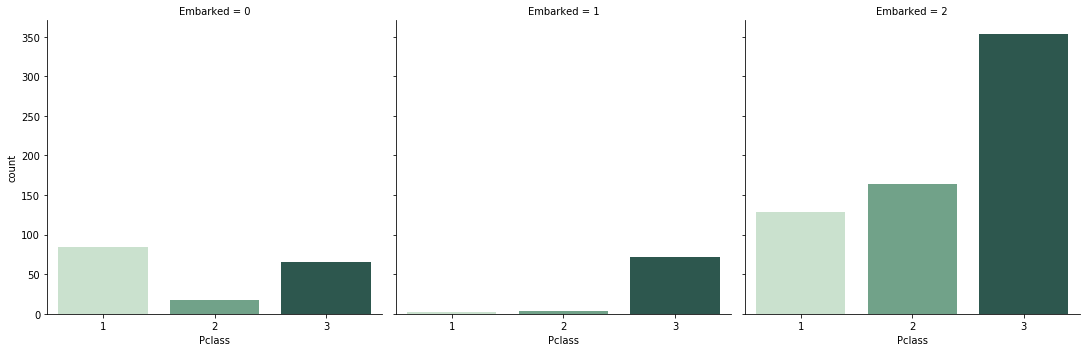

In [79]:
sns.catplot("Pclass", col = "Embarked", data= train_data, kind = "count", palette=("ch:2.5,-.2,dark=.3"))
plt.show()

In [80]:
crossAna4 = pd.crosstab([train_data.Pclass],train_data.Embarked, margins=True)
crossAna4.style.background_gradient(cmap = 'summer_r')

Embarked,0,1,2,All
Pclass,,,,
1,85,2,129,216
2,17,3,164,184
3,66,72,353,491
All,168,77,646,891


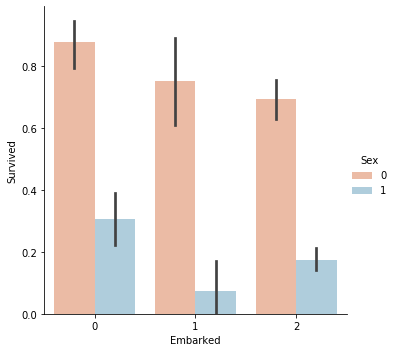

In [81]:
sns.catplot(hue="Sex", x="Embarked",y="Survived", data = train_data, kind="bar",size = 5, palette = "RdBu")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


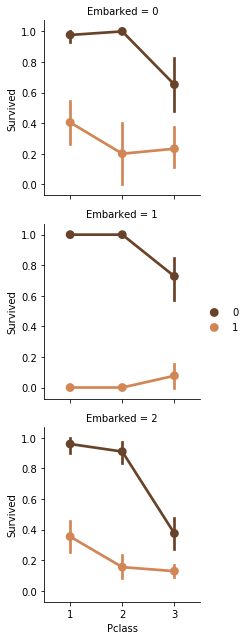

In [82]:
grid3 = sns.FacetGrid(train_data, row='Embarked')
grid3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='copper', ci=95, hue_order=None)
grid3.add_legend()
plt.show()

In [83]:
crossAna2 = pd.crosstab([train_data.Embarked],train_data.Survived, margins=True)
crossAna2.style.background_gradient(cmap = 'YlOrBr_r')

Survived,0,1,All
Embarked,,,
0,75,93,168
1,47,30,77
2,427,219,646
All,549,342,891


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


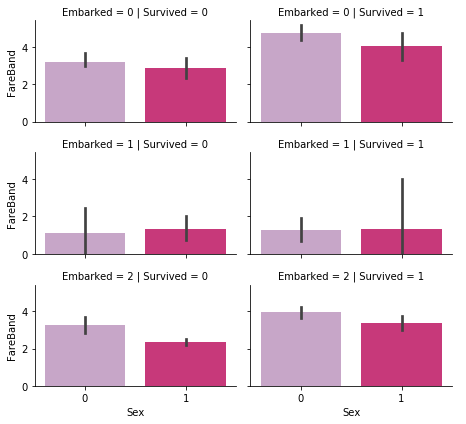

In [84]:
grid4 = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2, aspect=1.6)
grid4.map(sns.barplot, 'Sex', 'FareBand', alpha=1, palette='PuRd', ci=95, hue_order=None)
grid4.add_legend()
plt.show()

In [85]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


From the above observation, they have zero correlation for certain values so it is best to look at it individually.

In [86]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


From the above observation, they have zero correlation for certain values so it is best to look at individually.

In [87]:
crossAna4 = pd.crosstab([train_data.SibSp], train_data.Parch, margins=True)
crossAna4.style.background_gradient(cmap = 'Blues')

Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,537,38,29,1,1,2,0,608
1,123,57,19,3,3,3,1,209
2,16,7,4,1,0,0,0,28
3,2,7,7,0,0,0,0,16
4,0,9,9,0,0,0,0,18
5,0,0,5,0,0,0,0,5
8,0,0,7,0,0,0,0,7
All,678,118,80,5,4,5,1,891


In [88]:
crossAna3 = pd.crosstab([train_data.Survived], train_data.SibSp, margins=True)
crossAna3.style.background_gradient(cmap = "summer")

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


From the above, it is evident that as the number of siblings increased there was a drop in survival rate. There is a drastic drip with 2 siblings and more. Larger the family size (5 or more) survival rate is 0.

In [89]:
crossAna5 = pd.crosstab([train_data.Pclass], train_data.SibSp, margins=True)
crossAna5.style.background_gradient(cmap = 'PuRd')

SibSp,0,1,2,3,4,5,8,All
Pclass,,,,,,,,
1,137,71,5,3,0,0,0,216
2,120,55,8,1,0,0,0,184
3,351,83,15,12,18,5,7,491
All,608,209,28,16,18,5,7,891


It is clear that SibSp of 4 or above were in Pclass3.

(5.0, 0.0)

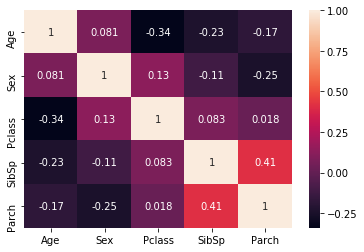

In [90]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
import seaborn as sns
corr = train_data[["Age","Sex", "Pclass","SibSp","Parch"]].corr()
ax = sns.heatmap(corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [91]:
train_data['Age'] = train_data['Age'].astype(int)

In [92]:
train_data.drop(['Name','Fare','Ticket','Cabin'],axis=1, inplace = True)

In [93]:
test_data.drop(['Name','Fare','Ticket','Cabin'],axis=1, inplace = True)

In [94]:
train_data.drop(['AgeBin'],axis=1, inplace = True)

In [95]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FareBand
0,1,0,3,1,22,1,0,2,0
1,2,1,1,0,38,1,0,0,6
2,3,1,3,0,26,0,0,2,1
3,4,1,1,0,35,1,0,2,5
4,5,0,3,1,35,0,0,2,1


In [96]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,FareBand
0,892,3,1,34,0,0,1,1
1,893,3,0,47,1,0,2,0
2,894,2,1,62,0,0,1,2
3,895,3,1,27,0,0,2,2
4,896,3,0,22,1,1,2,2


In [97]:
#separate train features and label
X = train_data.drop("Survived", axis=1)
Y = train_data['Survived']

#### Outlier - Logistic Regression

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [99]:
# let's separate into training and testing set

# remember that to avoid overfitting and improve generalisation
# machine learning models need to be built on a train set
# and evaluated on a test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=18)
X_train.shape, X_test.shape

((668, 8), (223, 8))

In [100]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
#model build on data with outliers

#Logistic Regression model

logReg = LogisticRegression(random_state= 44)

#train the model
logReg.fit(X_train, Y_train)

#Predict on test dataset
pred = logReg.predict_proba(X_test)

print('LogReg Accuracy: {}'.format(logReg.score(X_test, Y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(Y_test, pred[:, 1])))

LogReg Accuracy: 0.8385650224215246
LogReg roc-auc: 0.8988336713995942


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
# model built on data with outliers

# call model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# train model
ada.fit(X_train, Y_train)

# make predictions
pred = ada.predict_proba(X_test)

print('AdaBoost Accuracy: {}'.format(ada.score(X_test, Y_test)))
print('AdaBoost roc-auc: {}'.format(roc_auc_score(Y_test, pred[:, 1])))

AdaBoost Accuracy: 0.8161434977578476
AdaBoost roc-auc: 0.8461798512508452


In [103]:
# model built on data with outliers

# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(X_train, Y_train)

# make predictions
pred = rf.predict_proba(X_test)

print('Random Forests Accuracy: {}'.format(rf.score(X_test, Y_test)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(Y_test, pred[:, 1])))

Random Forests Accuracy: 0.8609865470852018
Random Forests roc-auc: 0.890973630831643


In [104]:
# model built on data with outliers

# call DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# train model
dt.fit(X_train, Y_train)

# make predictions
pred = dt.predict_proba(X_test)

print('Decision Tree Accuracy: {}'.format(dt.score(X_test, Y_test)))
print('Decision Tree roc-auc: {}'.format(roc_auc_score(Y_test, pred[:, 1])))

Decision Tree Accuracy: 0.7847533632286996
Decision Tree roc-auc: 0.7676217038539555


In [105]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Support Vector Machine Accuracy:",metrics.accuracy_score(Y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))

Support Vector Machine Accuracy: 0.8071748878923767
Precision: 0.775
Recall: 0.7126436781609196


In [106]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, X, Y, cv=5, scoring='f1_macro')
print(scores)

[0.80446927 0.81005587 0.78651685 0.75280899 0.78531073]
Accuracy: 0.79 (+/- 0.04)
[0.79307725 0.79724147 0.77123918 0.72775306 0.7674917 ]


In [107]:
#StandardScaler() will normalize the each features(X), it will have mean = 0 and standard deviation = 1.
#import preprocessing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, Y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, Y_test)

0.8654708520179372

#### StandardScaler and Random Forest accuracy is better than SVM, AdaBoost, DecisionTreeClassifier and Logistic Regression.